In [12]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from datetime import datetime

In [13]:
# Path to the uploaded CSV files
path = "./"
all_files = glob.glob(path + "regional-hu-weekly-*.csv")

# Function to extract date from filename
def extract_date(filename):
    base = os.path.basename(filename)
    date_str = base.split('-')[-1].replace('.csv', '')
    return pd.to_datetime(date_str)

# Read and concatenate all files with date as an additional column
df_list = []
for file in all_files:
    df = pd.read_csv(file)
    df['Date'] = file[21:31]
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

combined_df

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,Date
0,1,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,132,2,71251,2019-01-03
1,2,spotify:track:0E9ZjEAyAwOXZ7wJC0PD33,"Dynoro, Gigi D'Agostino",In My Mind,Columbia/B1 Recordings,1,34,27,58877,2019-01-03
2,3,spotify:track:5p7ujcrUXASCNwRaWNHR1C,Halsey,Without Me,Capitol Records,3,38,13,51663,2019-01-03
3,4,spotify:track:2rPE9A1vEgShuZxxzR2tZH,Ariana Grande,"thank u, next",Republic Records,1,41,9,48710,2019-01-03
4,5,spotify:track:3KkXRkHbMCARz0aVfEt68P,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,Universal Records,5,48,11,48618,2019-01-03
...,...,...,...,...,...,...,...,...,...,...
57795,196,spotify:track:2glGP8kEfACgJdZ86kWxhN,Lost Frequencies,Are You With Me,Armada Music Albums,177,-1,5,41991,2024-07-11
57796,197,spotify:track:3AjSfp5FDvwtMU9XBsbS8j,Creeds,Push Up - Main Edit,Columbia/B1 Recordings,94,200,57,41989,2024-07-11
57797,198,spotify:track:0YThXX1dqUpYBLyJNAsF9N,Yeat,If We Being Rëal,Field Trip Recordings/Capitol Records,77,190,12,41847,2024-07-11
57798,199,spotify:track:5T7eEaieasnflXh6iPLlrK,Azahriah,téveszmék,Supermanagement,5,-1,86,41592,2024-07-11


# Filtering out songs with less than 15 occurences

It is very important to group by both artist and track.

In [14]:
count_of_instances = combined_df.groupby(["artist_names", "track_name"])["streams"].count().sort_values()
count_of_instances_df = pd.DataFrame(count_of_instances).reset_index()
artists_and_tracks_to_use = count_of_instances_df[count_of_instances_df["streams"] >= 15][["artist_names", "track_name"]]
combined_df2 = combined_df.merge(artists_and_tracks_to_use, on=["artist_names", "track_name"])
#combined_df2["Date"] = pd.to_datetime(combined_df2["Date"])
combined_df2

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,Date
0,1,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,132,2,71251,2019-01-03
1,1,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,1,3,68430,2019-01-10
2,1,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,1,4,69934,2019-01-17
3,2,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,1,5,72674,2019-01-24
4,4,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,2,6,71345,2019-01-31
...,...,...,...,...,...,...,...,...,...,...
48729,142,spotify:track:2uqYupMHANxnwgeiXTZXzd,Dasha,Austin (Boots Stop Workin'),Warner Records,82,145,11,52489,2024-06-13
48730,170,spotify:track:2uqYupMHANxnwgeiXTZXzd,Dasha,Austin (Boots Stop Workin'),Warner Records,82,142,12,48908,2024-06-20
48731,166,spotify:track:2uqYupMHANxnwgeiXTZXzd,Dasha,Austin (Boots Stop Workin'),Warner Records,82,170,13,47613,2024-06-27
48732,162,spotify:track:2uqYupMHANxnwgeiXTZXzd,Dasha,Austin (Boots Stop Workin'),Warner Records,82,166,14,47213,2024-07-04


In [15]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="20ddf5269e214f479a81bd27929af65c",
                                                   client_secret="736f0184659740f7add037072c214e5f"))

#sp.track("2bJvI42r8EF3wxjOuDav4r")["album"]["release_date"]

In [ ]:
sp.track("2bJvI42r8EF3wxjOuDav4r")["album"]["release_date"], sp.track("2bJvI42r8EF3wxjOuDav4r")["album"]["release_date_precision"]

In [9]:
import requests
from spotipy import Spotify
from spotipy.oauth2 import SpotifyClientCredentials

# Create a custom session with a timeout
class TimeoutSession(requests.Session):
    def request(self, *args, **kwargs):
        kwargs['timeout'] = 10  # Set the timeout here
        return super().request(*args, **kwargs)

# Use the custom session in Spotipy
auth_manager = SpotifyClientCredentials(client_id="2f810920c9ae4726bdc40385bc3aa33c",
                                        client_secret="8696d8d9bf3443f4ba039dd7f6abad34")
session = TimeoutSession()
sp = Spotify(auth_manager=auth_manager, requests_session=session)

def get_track_release_date(track_id):
    try:
        response = sp.track(track_id)
        return response["album"]["release_date"]
    except requests.exceptions.Timeout:
        print("Request timed out. Please try again later.")
        return None
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

release_date = get_track_release_date("2bJvI42r8EF3wxjOuDav4r")
print(release_date)


HTTP Error for GET to https://api.spotify.com/v1/tracks/2bJvI42r8EF3wxjOuDav4r with Params: {'market': None} returned 429 due to Too many requests


SpotifyException: http status: 429, code:-1 - https://api.spotify.com/v1/tracks/2bJvI42r8EF3wxjOuDav4r:
 Too many requests, reason: None

# Unique dates

In [16]:
date_objects = [datetime.strptime(date, '%Y-%m-%d') for date in combined_df2["Date"].unique()]
dates_np = np.array(date_objects, dtype='datetime64[D]')
dates_np

array(['2019-01-03', '2019-01-10', '2019-01-17', '2019-01-24',
       '2019-01-31', '2019-02-07', '2019-02-14', '2019-02-21',
       '2019-02-28', '2019-03-07', '2019-03-14', '2019-03-21',
       '2019-03-28', '2019-04-04', '2019-04-11', '2019-04-18',
       '2019-04-25', '2019-05-02', '2019-05-09', '2019-05-16',
       '2019-05-23', '2019-05-30', '2019-06-06', '2019-06-13',
       '2019-06-20', '2019-06-27', '2019-07-04', '2019-07-11',
       '2019-07-18', '2019-07-25', '2019-08-01', '2019-08-08',
       '2019-08-15', '2019-08-22', '2019-08-29', '2019-09-05',
       '2019-09-12', '2019-09-19', '2019-09-26', '2019-10-03',
       '2019-10-10', '2019-10-17', '2019-10-24', '2019-10-31',
       '2019-11-07', '2019-11-14', '2019-11-21', '2019-11-28',
       '2019-12-05', '2019-12-12', '2019-12-19', '2019-12-26',
       '2020-01-02', '2020-01-09', '2020-01-16', '2020-01-23',
       '2020-01-30', '2020-02-06', '2020-02-13', '2020-02-20',
       '2020-02-27', '2020-03-05', '2020-03-12', '2020-

# get_week function

In [17]:
def get_week(search_date):
    index = np.searchsorted(dates_np, search_date, side='left')
    if index < len(dates_np):
        result_date = dates_np[index]
    else:
        result_date = dates_np[-1]
    return result_date

get_week(np.datetime64('2024-07-04'))

numpy.datetime64('2024-05-02')

In [18]:
len(combined_df2["track_name"].unique()), len(combined_df2["uri"].unique())

(1004, 1433)

In [17]:
grouped = combined_df2.groupby('track_name')['uri'].agg(set).reset_index()
for lab, row in grouped.iterrows():
    if len(row["uri"]) > 1:
        print(row)

track_name                                             100 Hiba
uri           {spotify:track:2OcJ6IFLooNGjyiL9HaDab, spotify...
Name: 1, dtype: object
track_name                                                10:35
uri           {spotify:track:6BePGk3eCan4FqaW2X8Qy3, spotify...
Name: 3, dtype: object
track_name                                                 12+1
uri           {spotify:track:2asLrxe3eVglORCcUhQBnc, spotify...
Name: 5, dtype: object
track_name                                                   21
uri           {spotify:track:10QtlJjHSPW5liaoTzOBeL, spotify...
Name: 12, dtype: object
track_name                                                3 Nap
uri           {spotify:track:1dApWF2K4c91sOq0esaufz, spotify...
Name: 15, dtype: object
track_name                                              4k love
uri           {spotify:track:6yXounxXKpmTb3LfiUoG6e, spotify...
Name: 18, dtype: object
track_name                                              7 rings
uri           {spotify:trac

In [18]:
grouped.iloc[5]["uri"]

{'spotify:track:2asLrxe3eVglORCcUhQBnc',
 'spotify:track:4XknBxvyrcsGqbLoIQZI3G',
 'spotify:track:52GlArsRTqvo36GXJQa7ab',
 'spotify:track:6zFRchn52NT2s5Brvqmsqn'}

# Getting the release weeks for the unique urls

In [ ]:
from tqdm import tqdm

release_weeks = []
for url in tqdm(combined_df2["uri"].unique(), desc="Processing URIs"):
    id = url.split(":")[-1]
    try:
        date = sp.track(id)["album"]["release_date"]
        if sp.track(id)["album"]["release_date_precision"] != "day":
            date = date + "-01-01"
        date_np = np.datetime64(date)
        release_weeks.append(get_week(date_np))
    except:
        print(f'Error occured for {id}')


release_weeks

Processing URIs:  59%|████████████████████████████████████▋                         | 884/1492 [03:52<02:11,  4.62it/s]

In [23]:
release_df = pd.DataFrame({"uri" : combined_df2["uri"].unique(), "release_week" : release_weeks})
release_df

,uri,release_week
0,spotify:track:6MWtB6iiXyIwun0YzU6DFP,2019-01-03
1,spotify:track:0E9ZjEAyAwOXZ7wJC0PD33,2019-01-03
2,spotify:track:5p7ujcrUXASCNwRaWNHR1C,2019-01-03
3,spotify:track:2rPE9A1vEgShuZxxzR2tZH,2019-01-03
4,spotify:track:3KkXRkHbMCARz0aVfEt68P,2019-01-03
...,...,...
1505,spotify:track:4rTPLtqJxa4UtCBkdMwSp6,2024-06-27
1506,spotify:track:4k1ysf9Jx5zmmubqGp5pD3,2019-01-03
1507,spotify:track:7CgAXaZVLtM6dSuo9fxLeh,2024-06-27
1508,spotify:track:5kv5vvLDSMjyA6NbACCDFa,2021-03-04


In [24]:
release_df.to_csv("url_with_release_weeks", index = False)

# Merging the two DataFrames together

In [27]:
release_df = pd.read_csv("url_with_release_weeks")
release_df["release_week"] = pd.to_datetime(release_df["release_week"])
release_df

,uri,release_week
0,spotify:track:6MWtB6iiXyIwun0YzU6DFP,2019-01-03
1,spotify:track:0E9ZjEAyAwOXZ7wJC0PD33,2019-01-03
2,spotify:track:5p7ujcrUXASCNwRaWNHR1C,2019-01-03
3,spotify:track:2rPE9A1vEgShuZxxzR2tZH,2019-01-03
4,spotify:track:3KkXRkHbMCARz0aVfEt68P,2019-01-03
...,...,...
1505,spotify:track:4rTPLtqJxa4UtCBkdMwSp6,2024-06-27
1506,spotify:track:4k1ysf9Jx5zmmubqGp5pD3,2019-01-03
1507,spotify:track:7CgAXaZVLtM6dSuo9fxLeh,2024-06-27
1508,spotify:track:5kv5vvLDSMjyA6NbACCDFa,2021-03-04


In [28]:
df_with_release_dates = combined_df2.merge(release_df, on = "uri", how = "inner")
df_with_release_dates

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,Date,release_week
0,1,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,132,2,71251,2019-01-03,2019-01-03
1,1,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,1,3,68430,2019-01-10,2019-01-03
2,1,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,1,4,69934,2019-01-17,2019-01-03
3,2,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,1,5,72674,2019-01-24,2019-01-03
4,4,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,2,6,71345,2019-01-31,2019-01-03
...,...,...,...,...,...,...,...,...,...,...,...
48729,142,spotify:track:2uqYupMHANxnwgeiXTZXzd,Dasha,Austin (Boots Stop Workin'),Warner Records,82,145,11,52489,2024-06-13,2024-02-22
48730,170,spotify:track:2uqYupMHANxnwgeiXTZXzd,Dasha,Austin (Boots Stop Workin'),Warner Records,82,142,12,48908,2024-06-20,2024-02-22
48731,166,spotify:track:2uqYupMHANxnwgeiXTZXzd,Dasha,Austin (Boots Stop Workin'),Warner Records,82,170,13,47613,2024-06-27,2024-02-22
48732,162,spotify:track:2uqYupMHANxnwgeiXTZXzd,Dasha,Austin (Boots Stop Workin'),Warner Records,82,166,14,47213,2024-07-04,2024-02-22


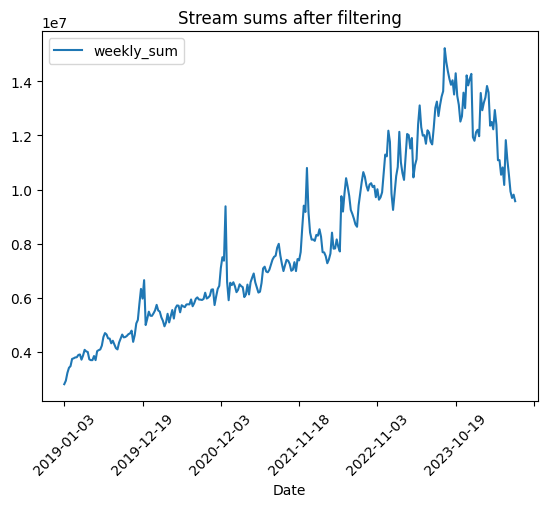

In [29]:
normalizing_df = pd.DataFrame(df_with_release_dates.groupby("Date")["streams"].sum()).reset_index()
normalizing_df.columns = ["Date", "weekly_sum"]
normalizing_df.plot(x = "Date", y = "weekly_sum")
plt.title("Stream sums after filtering")
plt.xticks(rotation = 45)
plt.show()

# Normalizing the streams each week

In [30]:
df_normalized = df_with_release_dates.merge(normalizing_df, on = "Date", how = "inner")
df_normalized["normalized_streams"] = df_normalized["streams"] / df_normalized["weekly_sum"]
df_normalized

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,Date,release_week,weekly_sum,normalized_streams
0,1,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,132,2,71251,2019-01-03,2019-01-03,2813875,0.025321
1,2,spotify:track:0E9ZjEAyAwOXZ7wJC0PD33,"Dynoro, Gigi D'Agostino",In My Mind,Columbia/B1 Recordings,1,34,27,58877,2019-01-03,2019-01-03,2813875,0.020924
2,3,spotify:track:5p7ujcrUXASCNwRaWNHR1C,Halsey,Without Me,Capitol Records,3,38,13,51663,2019-01-03,2019-01-03,2813875,0.018360
3,4,spotify:track:2rPE9A1vEgShuZxxzR2tZH,Ariana Grande,"thank u, next",Republic Records,1,41,9,48710,2019-01-03,2019-01-03,2813875,0.017311
4,5,spotify:track:3KkXRkHbMCARz0aVfEt68P,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,Universal Records,5,48,11,48618,2019-01-03,2019-01-03,2813875,0.017278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48729,22,spotify:track:2H5Xte3poqJ1ld8HtmC7yc,Azahriah,cipoe,Supermanagement,2,17,5,138804,2024-05-02,2024-04-04,11084011,0.012523
48730,11,spotify:track:5Z0UnEtpLDQyYlWwgi8m9C,Hozier,Too Sweet,Rubyworks / Universal-Island Records Ltd,5,15,5,182297,2024-05-02,2024-03-28,11084011,0.016447
48731,145,spotify:track:1rIKgCH4H52lrvDcz50hS8,Zara Larsson,Lush Life,Epic/Record Company TEN,86,172,35,49072,2024-05-02,2019-01-03,11084011,0.004427
48732,178,spotify:track:22mek4IiqubGD9ctzxc69s,"Calvin Harris, Disciples",How Deep Is Your Love,Columbia,156,188,5,42988,2024-05-02,2019-01-03,11084011,0.003878


In [51]:
pd.DataFrame(df_normalized.groupby(["artist_names", "track_name"])["normalized_streams"].mean().sort_values(ascending = False)).reset_index()

,artist_names,track_name,normalized_streams
0,Artemas,i like the way you kiss me,0.025049
1,"DESH, Young Fly, Azahriah, Lord Panamo",Rampapapam,0.020731
2,Azahriah,introvertált dal,0.020625
3,Manuel,Tiara,0.019779
4,Pogány Induló,Úgy Hiszem,0.019329
...,...,...,...
1009,Hippie Sabotage,Devil Eyes,0.002991
1010,Imagine Dragons,Demons,0.002961
1011,"Wellhello, Halott Pénz","Emlékszem, Sopronban (A Volt Fesztivál himnusza)",0.002893
1012,Lana Del Rey,Summertime Sadness,0.002866


# Getting only one release date for songs

In [32]:
release_week_correction = df_normalized.groupby(["artist_names", "track_name"])["release_week"].agg(set).reset_index()
release_weeks_list = []
for lab, row in release_week_correction.iterrows():
    release_weeks_list.append(min(row["release_week"]))

release_week_correction

,artist_names,track_name,release_week
0,21 Savage,redrum,{2024-01-18 00:00:00}
1,24kGoldn,CITY OF ANGELS,{2019-11-28 00:00:00}
2,24kGoldn,VALENTINO,"{2019-11-28 00:00:00, 2019-01-31 00:00:00}"
3,"24kGoldn, iann dior",Mood (feat. iann dior),"{2021-04-01 00:00:00, 2020-07-30 00:00:00}"
4,30Y,Bogozd Ki,{2019-01-03 00:00:00}
...,...,...,...
1009,"mgk, blackbear",my ex's best friend (with blackbear),"{2020-10-01 00:00:00, 2020-08-13 00:00:00}"
1010,twocolors,Lovefool,{2020-05-14 00:00:00}
1011,"¥$, Kanye West, Ty Dolla $ign, Rich The Kid, P...",CARNIVAL,{2024-02-15 00:00:00}
1012,"Ótvar Pestis, Pogány Induló",Alattam,{2023-06-08 00:00:00}


In [33]:
release_week_correction["release_week"] = release_weeks_list
release_week_correction

,artist_names,track_name,release_week
0,21 Savage,redrum,2024-01-18
1,24kGoldn,CITY OF ANGELS,2019-11-28
2,24kGoldn,VALENTINO,2019-01-31
3,"24kGoldn, iann dior",Mood (feat. iann dior),2020-07-30
4,30Y,Bogozd Ki,2019-01-03
...,...,...,...
1009,"mgk, blackbear",my ex's best friend (with blackbear),2020-08-13
1010,twocolors,Lovefool,2020-05-14
1011,"¥$, Kanye West, Ty Dolla $ign, Rich The Kid, P...",CARNIVAL,2024-02-15
1012,"Ótvar Pestis, Pogány Induló",Alattam,2023-06-08


In [34]:
df_normalized = df_normalized.drop("release_week", axis = "columns")
df_normalized

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,Date,weekly_sum,normalized_streams
0,1,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,132,2,71251,2019-01-03,2813875,0.025321
1,2,spotify:track:0E9ZjEAyAwOXZ7wJC0PD33,"Dynoro, Gigi D'Agostino",In My Mind,Columbia/B1 Recordings,1,34,27,58877,2019-01-03,2813875,0.020924
2,3,spotify:track:5p7ujcrUXASCNwRaWNHR1C,Halsey,Without Me,Capitol Records,3,38,13,51663,2019-01-03,2813875,0.018360
3,4,spotify:track:2rPE9A1vEgShuZxxzR2tZH,Ariana Grande,"thank u, next",Republic Records,1,41,9,48710,2019-01-03,2813875,0.017311
4,5,spotify:track:3KkXRkHbMCARz0aVfEt68P,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,Universal Records,5,48,11,48618,2019-01-03,2813875,0.017278
...,...,...,...,...,...,...,...,...,...,...,...,...
48729,22,spotify:track:2H5Xte3poqJ1ld8HtmC7yc,Azahriah,cipoe,Supermanagement,2,17,5,138804,2024-05-02,11084011,0.012523
48730,11,spotify:track:5Z0UnEtpLDQyYlWwgi8m9C,Hozier,Too Sweet,Rubyworks / Universal-Island Records Ltd,5,15,5,182297,2024-05-02,11084011,0.016447
48731,145,spotify:track:1rIKgCH4H52lrvDcz50hS8,Zara Larsson,Lush Life,Epic/Record Company TEN,86,172,35,49072,2024-05-02,11084011,0.004427
48732,178,spotify:track:22mek4IiqubGD9ctzxc69s,"Calvin Harris, Disciples",How Deep Is Your Love,Columbia,156,188,5,42988,2024-05-02,11084011,0.003878


In [35]:
df_normalized_corrected = df_normalized.merge(release_week_correction, on = ["artist_names", "track_name"], how = "inner")
df_normalized_corrected

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,Date,weekly_sum,normalized_streams,release_week
0,1,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,132,2,71251,2019-01-03,2813875,0.025321,2019-01-03
1,1,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,1,3,68430,2019-01-10,2943055,0.023251,2019-01-03
2,1,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,1,4,69934,2019-01-17,3229835,0.021652,2019-01-03
3,2,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,1,5,72674,2019-01-24,3418354,0.021260,2019-01-03
4,4,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,2,6,71345,2019-01-31,3481673,0.020492,2019-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48729,170,spotify:track:2uqYupMHANxnwgeiXTZXzd,Dasha,Austin (Boots Stop Workin'),Warner Records,82,142,12,48908,2024-06-20,9929437,0.004926,2024-02-22
48730,166,spotify:track:2uqYupMHANxnwgeiXTZXzd,Dasha,Austin (Boots Stop Workin'),Warner Records,82,170,13,47613,2024-06-27,9687566,0.004915,2024-02-22
48731,162,spotify:track:2uqYupMHANxnwgeiXTZXzd,Dasha,Austin (Boots Stop Workin'),Warner Records,82,166,14,47213,2024-07-04,9809681,0.004813,2024-02-22
48732,161,spotify:track:2uqYupMHANxnwgeiXTZXzd,Dasha,Austin (Boots Stop Workin'),Warner Records,82,162,15,45881,2024-07-11,9568369,0.004795,2024-02-22


# Occurence counts and percentages

In [36]:
df_occurences = pd.DataFrame(df_normalized_corrected.groupby(["artist_names", "track_name"])["streams"].count().sort_values(ascending = False)).reset_index()
df_occurences = df_occurences.merge(release_week_correction, on = ["artist_names", "track_name"], how = "inner")
df_occurences["release_week"] = pd.to_datetime(df_occurences["release_week"])
df_occurences    

,artist_names,track_name,streams,release_week
0,Bagossy Brothers Company,Olyan Ő,278,2019-01-24
1,Eminem,Without Me,260,2019-01-03
2,"Dzsúdló, Lil Frakk",Lej,233,2019-11-21
3,Halott Pénz,Amikor Feladnád,227,2019-04-04
4,The Weeknd,Blinding Lights,225,2019-12-05
...,...,...,...,...
1009,Zara Larsson,Lush Life,15,2019-01-03
1010,Zara Larsson,Ruin My Life,15,2019-01-03
1011,"BERRY, T. Danny",Vámpír,15,2022-10-20
1012,Justin Bieber,Hold On,15,2021-03-11


In [37]:
weeks_after_release = []
for value in df_occurences["release_week"].values:
    weeks_after_release.append(sum(value <= dates_np))

df_occurences["weeks_after_release"] = weeks_after_release
df_occurences["occurence_percentage"] = df_occurences["streams"] / df_occurences["weeks_after_release"] * 100
df_occurences["log_occurence"] = np.log(df_occurences["occurence_percentage"])
df_occurences.sort_values("occurence_percentage", ascending = False)

,artist_names,track_name,streams,release_week,weeks_after_release,occurence_percentage,log_occurence
88,Azahriah,four moods,101,2022-08-18,100,101.000000,4.615121
87,Azahriah,figyelj,101,2022-08-18,100,101.000000,4.615121
629,"Bruno X Spacc, KÚTVÖLGYI SÁRA",Loca,28,2024-01-04,28,100.000000,4.605170
520,"L.L. Junior, KKevin, Rytmus, Érdi Baba",Cigány-ügy,34,2023-11-23,34,100.000000,4.605170
989,Azahriah,cipoe,15,2024-04-04,15,100.000000,4.605170
...,...,...,...,...,...,...,...
992,"ByeAlex és a Slepp, Dannona",Fekete (feat. Dannona),15,2019-01-03,289,5.190311,1.646794
1009,Zara Larsson,Lush Life,15,2019-01-03,289,5.190311,1.646794
1010,Zara Larsson,Ruin My Life,15,2019-01-03,289,5.190311,1.646794
984,Melanie Martinez,Play Date,15,2019-01-03,289,5.190311,1.646794


In [38]:
4.615121 / 1.646794, 2.004321 / 0.715193

(2.8024883500911466, 2.802489677611498)

In [39]:
mean_streams_df = pd.DataFrame(df_normalized.groupby(["artist_names", "track_name"])["normalized_streams"].mean().sort_values(ascending = False)).reset_index()
mean_streams_df.head(20)

,artist_names,track_name,normalized_streams
0,Artemas,i like the way you kiss me,0.025049
1,"DESH, Young Fly, Azahriah, Lord Panamo",Rampapapam,0.020731
2,Azahriah,introvertált dal,0.020625
3,Manuel,Tiara,0.019779
4,Pogány Induló,Úgy Hiszem,0.019329
5,Azahriah,3korty,0.016479
6,Pogány Induló,Mámor,0.016310
7,"Pogány Induló, Parno Graszt",Székelykapu,0.016127
8,"Beton.Hofi, Hundred Sins",BAGIRA,0.015887
9,Hozier,Too Sweet,0.014972


# Popularity scores

The averages of the normalized streams are multiplied by: <br>
1. The logarithm (natural logarithm) of the percentage of occurences of a song after its release date.
2. The log (log10) of how many times a song appeared in the top200. <br>
<br>
In popularity_score1, only the first multiplicator is used. <br>
In popularity_score2, both multipliers are used.

In [52]:
df_occurences_means = df_occurences.merge(mean_streams_df, on = ["artist_names", "track_name"], how = "inner")
df_occurences_means["popularity_score1"] = df_occurences_means["normalized_streams"] * df_occurences_means["log_occurence"]
df_occurences_means["popularity_score2"] = df_occurences_means["normalized_streams"] * df_occurences_means["log_occurence"] * np.log10(df_occurences_means["streams"])
df_occurences_means.sort_values("popularity_score1", ascending = False).head(10)

,artist_names,track_name,streams,release_week,weeks_after_release,occurence_percentage,log_occurence,normalized_streams,popularity_score1,popularity_score2
930,Artemas,i like the way you kiss me,17,2024-03-21,17,100.00,4.605170,0.025049,0.115353,0.141936
336,"DESH, Young Fly, Azahriah, Lord Panamo",Rampapapam,51,2023-07-27,51,100.00,4.605170,0.020731,0.095472,0.163025
191,Azahriah,introvertált dal,73,2023-02-23,73,100.00,4.605170,0.020625,0.094983,0.176983
787,Manuel,Tiara,21,2024-02-22,21,100.00,4.605170,0.019779,0.091087,0.120437
725,Pogány Induló,Úgy Hiszem,23,2024-02-08,23,100.00,4.605170,0.019329,0.089012,0.121210
247,Azahriah,3korty,63,2023-05-04,63,100.00,4.605170,0.016479,0.075889,0.136550
749,Pogány Induló,Mámor,23,2024-02-08,23,100.00,4.605170,0.016310,0.075111,0.102281
732,"Pogány Induló, Parno Graszt",Székelykapu,23,2024-02-08,23,100.00,4.605170,0.016127,0.074269,0.101134
91,"Beton.Hofi, Hundred Sins",BAGIRA,99,2022-08-18,100,99.00,4.595120,0.015887,0.073001,0.145683
994,Hozier,Too Sweet,15,2024-03-28,16,93.75,4.540632,0.014972,0.067984,0.079955


In [53]:
df_occurences_means.sort_values("popularity_score2", ascending = False).head(10)

,artist_names,track_name,streams,release_week,weeks_after_release,occurence_percentage,log_occurence,normalized_streams,popularity_score1,popularity_score2
191,Azahriah,introvertált dal,73,2023-02-23,73,100.0,4.605170,0.020625,0.094983,0.176983
336,"DESH, Young Fly, Azahriah, Lord Panamo",Rampapapam,51,2023-07-27,51,100.0,4.605170,0.020731,0.095472,0.163025
91,"Beton.Hofi, Hundred Sins",BAGIRA,99,2022-08-18,100,99.0,4.595120,0.015887,0.073001,0.145683
930,Artemas,i like the way you kiss me,17,2024-03-21,17,100.0,4.605170,0.025049,0.115353,0.141936
247,Azahriah,3korty,63,2023-05-04,63,100.0,4.605170,0.016479,0.075889,0.136550
88,Azahriah,four moods,101,2022-08-18,100,101.0,4.615121,0.013899,0.064147,0.128571
15,"Azahriah, DESH",Mind1,163,2021-06-03,163,100.0,4.605170,0.012212,0.056237,0.124406
725,Pogány Induló,Úgy Hiszem,23,2024-02-08,23,100.0,4.605170,0.019329,0.089012,0.121210
787,Manuel,Tiara,21,2024-02-22,21,100.0,4.605170,0.019779,0.091087,0.120437
61,"Azahriah, DESH",Pullup,112,2022-05-26,112,100.0,4.605170,0.012554,0.057812,0.118470


In [54]:
df_occurences_means.sort_values("popularity_score2", ascending = False).tail(10)

,artist_names,track_name,streams,release_week,weeks_after_release,occurence_percentage,log_occurence,normalized_streams,popularity_score1,popularity_score2
978,"Tiësto, Mabel",God Is A Dancer (with Mabel),16,2019-09-26,251,6.374502,1.852306,0.003286,0.006087,0.007329
1008,Bruno X Spacc,Érzi A Tekintetem,15,2020-06-25,212,7.075472,1.956634,0.003065,0.005996,0.007052
925,Follow The Flow,Nem Fogadok Szót,17,2019-01-03,289,5.882353,1.771957,0.003200,0.005670,0.006977
979,"Dynoro, Ina Wroldsen",Obsessed,16,2019-03-28,277,5.776173,1.753741,0.003277,0.005746,0.006919
946,"Akon, Eminem",Smack That,16,2019-01-03,289,5.536332,1.711332,0.003287,0.005624,0.006773
992,"ByeAlex és a Slepp, Dannona",Fekete (feat. Dannona),15,2019-01-03,289,5.190311,1.646794,0.003484,0.005737,0.006747
1007,Shawn Mendes,There's Nothing Holdin' Me Back,15,2019-01-03,289,5.190311,1.646794,0.003454,0.005688,0.006690
923,Hippie Sabotage,Devil Eyes,17,2019-01-03,289,5.882353,1.771957,0.002991,0.005300,0.006522
993,Ruth B.,Dandelions,15,2019-01-03,289,5.190311,1.646794,0.003140,0.005171,0.006081
945,"Wellhello, Halott Pénz","Emlékszem, Sopronban (A Volt Fesztivál himnusza)",16,2019-01-03,289,5.536332,1.711332,0.002893,0.004950,0.005961


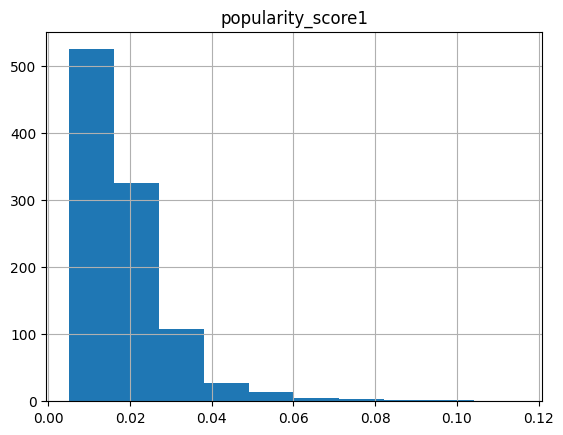

In [55]:
df_occurences_means["popularity_score1"].hist()
plt.title("popularity_score1")
plt.show()

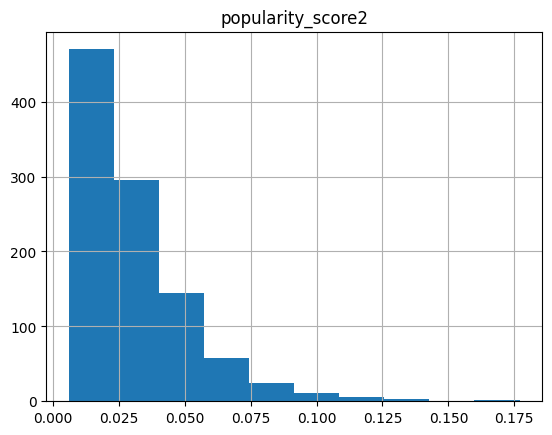

In [56]:
df_occurences_means["popularity_score2"].hist()
plt.title("popularity_score2")
plt.show()